In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.utils.data as Data
import numpy as np
import torch.nn.functional as F
import time

In [3]:
# Load the EMNIST dataset

train_data = torchvision.datasets.EMNIST(
    root='data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    split='letters'
)

test_data = torchvision.datasets.EMNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False,
    split='letters'     
)

Image Label: t


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157,
         0.0157, 0.0353, 0.1255, 0.1255, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0392, 0.4431,
         0.4980, 0.5490, 0.7961, 0.7961, 0.3059, 0.0275

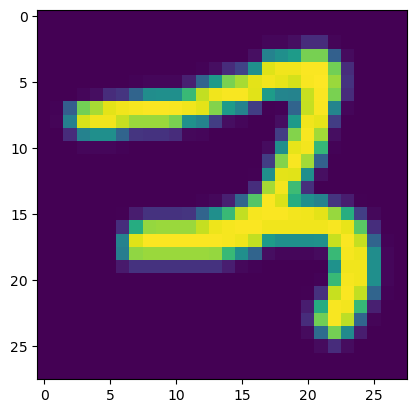

In [4]:
x_train = train_data.data / 255
y_train = train_data.targets - 1

# Show some random image of a character and its label

img_index = 16
img = x_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

img

In [5]:
a = torch.tensor([[x + 1 for x in range(28 * y, 28 * (y + 1))] for y in range(28)]).view(1, 1, 28, 28).float()
c = F.unfold(a, kernel_size=(4, 4), stride=4).transpose(1, 2).view(1, 7, 7, 16)
c

tensor([[[[  1.,   2.,   3.,   4.,  29.,  30.,  31.,  32.,  57.,  58.,  59.,
            60.,  85.,  86.,  87.,  88.],
          [  5.,   6.,   7.,   8.,  33.,  34.,  35.,  36.,  61.,  62.,  63.,
            64.,  89.,  90.,  91.,  92.],
          [  9.,  10.,  11.,  12.,  37.,  38.,  39.,  40.,  65.,  66.,  67.,
            68.,  93.,  94.,  95.,  96.],
          [ 13.,  14.,  15.,  16.,  41.,  42.,  43.,  44.,  69.,  70.,  71.,
            72.,  97.,  98.,  99., 100.],
          [ 17.,  18.,  19.,  20.,  45.,  46.,  47.,  48.,  73.,  74.,  75.,
            76., 101., 102., 103., 104.],
          [ 21.,  22.,  23.,  24.,  49.,  50.,  51.,  52.,  77.,  78.,  79.,
            80., 105., 106., 107., 108.],
          [ 25.,  26.,  27.,  28.,  53.,  54.,  55.,  56.,  81.,  82.,  83.,
            84., 109., 110., 111., 112.]],

         [[113., 114., 115., 116., 141., 142., 143., 144., 169., 170., 171.,
           172., 197., 198., 199., 200.],
          [117., 118., 119., 120., 145., 146.,

In [6]:
# choose a particular image and convert to the right type
temp_image = F.unfold(img.view(1, 1, 28, 28), kernel_size=(4, 4), stride=4).transpose(1, 2).view(7, 7, 16)
temp_image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0157, 0.0157, 0.0353, 0.0392, 0.4431, 0.4980, 0.5490],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.1255, 0.1255, 0.0118, 0.0000, 0.7961, 0.7961, 0.3059, 0.0275],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000

In [7]:
class TwoDimensionalLSTM_fixed_direction:
    """A 2-D LSTM scanning in the given direction.
       The input should be a 3-D tensor of shape row*col*input_feature.
       The output should be a 2-D tensor of shape row*(col*hidden_units).
       """
    def __init__(self, input_features, hidden_units, rows, cols, row_decre, col_decre):
        self.input_features = input_features
        self.hidden_units = hidden_units
        self.rows, self.cols = rows, cols
        self.row_size = len(rows)
        self.col_size = len(cols)
        self.row_decre = row_decre
        self.col_decre = col_decre
        self.row_init, self.col_init = rows[0], cols[0]

        # To avoid scattering of tanh(), initialization issue needs to be solved!!!

        # Input gate
        self.weight_input_gate = torch.randn((input_features, hidden_units)) * 0.01
        self.weight_input_state = torch.randn((hidden_units, hidden_units)) * 0.01
        self.weight_input_cellout = torch.randn((2, hidden_units, hidden_units)) * 0.01
        self.bias_input_gate = torch.randn(hidden_units) * 0.01

        # Forget gate
        self.weight_forget_gate = torch.randn((2, input_features, hidden_units)) * 0.01
        self.weight_forget_cellout = torch.randn((2, 2, hidden_units, hidden_units)) * 0.01
        self.weight_forget_state = torch.randn((2, hidden_units, hidden_units)) * 0.01
        self.bias_forget_gate = torch.randn((2, hidden_units)) * 0.01

        # Cell
        self.weight_cell = torch.randn((input_features, hidden_units)) * 0.01
        self.weight_cell_cellout = torch.randn((2, hidden_units, hidden_units)) * 0.01
        self.bias_cell = torch.randn(hidden_units) * 0.01

        # Output gate
        self.weight_output_gate = torch.randn((input_features, hidden_units)) * 0.01
        self.weight_output_cellout = torch.randn((2, hidden_units, hidden_units)) * 0.01
        self.weight_output_state = torch.randn((hidden_units, hidden_units)) * 0.01
        self.bias_output_gate = torch.randn(hidden_units) * 0.01


    def parameters(self):
        return [self.weight_input_gate, 
                self.weight_input_state, 
                self.weight_input_cellout,
                self.bias_input_gate,  # Input gate
                self.weight_forget_gate, 
                self.weight_forget_cellout,
                self.weight_forget_state, 
                self.bias_forget_gate,  # Forget gate
                self.weight_cell, 
                self.weight_cell_cellout,
                self.bias_cell,  # Cell
                self.weight_output_gate, 
                self.weight_output_cellout, 
                self.weight_output_state, 
                self.bias_output_gate] # Output gate
    
    def __call__(self, input_image):
        states = np.zeros((len(self.rows), len(self.cols))).tolist()
        cell_outputs = np.zeros((len(self.rows), len(self.cols))).tolist()

        for row in self.rows:
            for col in self.cols:
                _input = input_image[row][col]
                row_m = row + self.row_decre
                col_m = col + self.col_decre
                
                # Deal with input gate
                input_gate = _input @ self.weight_input_gate + self.bias_input_gate
                if row != self.row_init:
                    input_gate += states[row_m][col] @ self.weight_input_state \
                                + cell_outputs[row_m][col] @ self.weight_input_cellout[0]
                if col != self.col_init:
                    input_gate += states[row][col_m] @ self.weight_input_state \
                                + cell_outputs[row][col_m] @ self.weight_input_cellout[1]
                input_gate = input_gate.sigmoid()

                # Deal with forget gate
                forget_gates = []
                for dim in range(2):
                    forget_gate = _input @ self.weight_forget_gate[dim] + self.bias_forget_gate[dim]
                    if row != self.row_init:
                        forget_gate += cell_outputs[row_m][col] @ self.weight_forget_cellout[0][dim]
                    if col != self.col_init:
                        forget_gate += cell_outputs[row][col_m] @ self.weight_forget_cellout[1][dim]
                    if dim == 0 and row != self.row_init:
                        forget_gate += states[row_m][col] @ self.weight_forget_state[dim]
                    if dim == 1 and col != self.col_init:
                        forget_gate += states[row][col_m] @ self.weight_forget_state[dim]
                    forget_gates.append(forget_gate.sigmoid())

                # Deal with cell
                cell = _input @ self.weight_cell + self.bias_cell
                if row != self.row_init:
                    cell += cell_outputs[row_m][col] @ self.weight_cell_cellout[0]
                if col != self.col_init:
                    cell += cell_outputs[row][col_m] @ self.weight_cell_cellout[1]

                # Deal with state
                state = input_gate * cell.tanh()
                if row != self.row_init:
                    state += states[row_m][col] @ forget_gates[0]
                if col != self.col_init:
                    state += states[row][col_m] @ forget_gates[1]
                states[row][col] = state

                # Deal with output gate
                output_gate = _input @ self.weight_output_gate + self.bias_output_gate + state @ self.weight_output_state
                if row != self.row_init:
                    output_gate += cell_outputs[row_m][col] @ self.weight_output_cellout[0]
                if col != self.col_init:
                    output_gate += cell_outputs[row][col_m] @ self.weight_output_cellout[1]
                output_gate = output_gate.sigmoid()

                # Deal with cell output
                cell_outputs[row][col] = output_gate * state.tanh()

        return torch.stack([torch.stack(row_cell_outputs) for row_cell_outputs in cell_outputs]).view(self.row_size * self.col_size, self.hidden_units)

In [8]:
class TwoDimensionalLSTM:
    def __init__(self, input_features, hidden_units, row_size, col_size):
        self.hidden_units = hidden_units
        self.row_size, self.col_size = row_size, col_size
        self.top_left = TwoDimensionalLSTM_fixed_direction(input_features,
                                                           hidden_units,
                                                           np.arange(row_size),
                                                           np.arange(col_size),
                                                           -1, -1)
        self.top_right = TwoDimensionalLSTM_fixed_direction(input_features,
                                                            hidden_units,
                                                            np.arange(row_size),
                                                            np.arange(col_size - 1, -1, -1),
                                                            -1, 1)
        self.down_left = TwoDimensionalLSTM_fixed_direction(input_features,
                                                            hidden_units,
                                                            np.arange(row_size - 1, -1, -1),
                                                            np.arange(col_size),
                                                            1, -1)
        self.down_right = TwoDimensionalLSTM_fixed_direction(input_features,
                                                             hidden_units,
                                                             np.arange(row_size - 1, -1, -1),
                                                             np.arange(col_size - 1, -1, -1),
                                                             1, 1)
        self.weight = torch.randn((4 * hidden_units, hidden_units)) * 0.01
        self.bias = torch.randn(hidden_units) * 0.01
        self.parameter = self.top_left.parameters() + self.top_right.parameters()\
                        + self.down_left.parameters() + self.down_right.parameters() + [self.weight, self.bias]
        
    def parameters(self):
        return self.parameter
    
    def __call__(self, input_image):
        temp = torch.cat((self.top_left(input_image), self.top_right(input_image),
                          self.down_left(input_image), self.down_right(input_image)), dim=1)
        temp = (temp @ self.weight + self.bias).tanh()
        return F.fold(temp.transpose(0, 1).view(1, self.hidden_units, self.row_size * self.col_size),
                      (self.row_size, self.col_size * self.hidden_units),
                      (1, self.hidden_units),
                      stride=(1, self.hidden_units))[0][0]

In [9]:
# Parameters Settings 32 * 32

parameters = []

# The first layer of mdlstm, transfer to 8 * (8 * 2)
first_layer = TwoDimensionalLSTM(16, 2, 8, 8)
parameters.extend(first_layer.parameters())

# The second layer of mdlstm, transfer to 4 * (8 * 4)
second_layer = TwoDimensionalLSTM(4, 4, 4, 8)
parameters.extend(second_layer.parameters())

# The third layer of mklstm transfer to 2 * (16 * 8)
third_layer = TwoDimensionalLSTM(4, 8, 2, 16)
parameters.extend(third_layer.parameters())

# The fourth layer of mdlstm, transfer to  1 * (64 * 5)
fourth_layer = TwoDimensionalLSTM(4, 5, 1, 64)
parameters.extend(fourth_layer.parameters())

hidden_units1 = 10
output_units = 26

# Lookup matrix, reduce the dimension of 320
lookup = torch.randn((320, hidden_units1)) * 0.01
bias_lookup = torch.randn(hidden_units1) * 0.01

# The hidden layer
weight = torch.randn((hidden_units1, output_units))  * 0.01
bias = torch.randn(output_units) * 0.01

parameters += [lookup, bias_lookup, weight, bias]

for parameter in parameters:
    parameter.requires_grad = True

In [10]:
def forward_func(minibatch):
    # Minibacth is of shape N * 28 * 28
    batch_size = minibatch.shape[0]

    # Measure the execution time
    start_time = time.time()

    minibatch = minibatch.view(batch_size, 1, 28, 28)
    minibatch = F.unfold(minibatch, kernel_size=4, padding=2, stride=4).transpose(1, 2).view(batch_size, 8, 8, 16)
    minibatch = torch.stack([first_layer(batch) for batch in minibatch])

    print("use time {0} in the first layer".format(time.time() - start_time))
    start_time = time.time()

    # Minibacth is of shape N * 8 * 16
    minibatch = minibatch.view(batch_size, 1, 8, 16)
    minibatch = F.unfold(minibatch, kernel_size=2, stride=2).transpose(1, 2).view(batch_size, 4, 8, 4)
    minibatch = torch.stack([second_layer(batch) for batch in minibatch])

    print("use time {0} in the second layer".format(time.time() - start_time))
    start_time = time.time()

    # Minibatch is of shape N * 4 * 32
    minibatch = minibatch.view(batch_size, 1, 4, 32)
    minibatch = F.unfold(minibatch, kernel_size=2, stride=2).transpose(1, 2).view(batch_size, 2, 16, 4)
    minibatch = torch.stack([third_layer(batch) for batch in minibatch])

    print("use time {0} in the third layer".format(time.time() - start_time))
    start_time = time.time()
    
    # Minibatch is of shape N * 2 * 128
    minibatch = minibatch.view(batch_size, 1, 2, 128)
    minibatch = F.unfold(minibatch, kernel_size=2, stride=2).transpose(1, 2).view(batch_size, 1, 64, 4)
    minibatch = torch.stack([fourth_layer(batch) for batch in minibatch])

    print("use time {0} in the fourth layer".format(time.time() - start_time))
    start_time = time.time()

    minibatch = minibatch.view(batch_size, 320)

    return (minibatch @ lookup + bias_lookup).tanh() @ weight + bias

In [15]:
batch_size = 32
learning_rates = 10**torch.linspace(-3.0, 0.0, 100)

rate_i, loss_i = [], []

# Randomly select batch from the dataset
for _ in range(10):
    selected = torch.randint(0, x_train.shape[0], size=(batch_size,))
    batch_x = forward_func(x_train[selected])
    batch_y = y_train[selected]
    loss = F.cross_entropy(batch_x, batch_y)
    loss.backward()

    # learning_rate = learning_rates[_]
    # rate_i.append(learning_rate)
    # loss_i.append(loss.item())
    for parameter in parameters:
        parameter.data -= parameter.grad
        parameter.grad = None

use time 2.1435163021087646 in the first layer
use time 0.8712856769561768 in the second layer
use time 0.7503175735473633 in the third layer
use time 0.979649543762207 in the fourth layer
use time 1.797321081161499 in the first layer
use time 0.7510554790496826 in the second layer
use time 0.6955010890960693 in the third layer
use time 1.0789389610290527 in the fourth layer
use time 2.4813265800476074 in the first layer
use time 0.9182412624359131 in the second layer
use time 0.7667310237884521 in the third layer
use time 1.0135552883148193 in the fourth layer
use time 1.9987881183624268 in the first layer
use time 0.7673602104187012 in the second layer
use time 0.5740048885345459 in the third layer
use time 1.0702898502349854 in the fourth layer
use time 2.664102554321289 in the first layer
use time 0.9586710929870605 in the second layer
use time 0.691685676574707 in the third layer
use time 1.144834041595459 in the fourth layer
use time 1.9518535137176514 in the first layer
use time

In [16]:
loss

tensor(3.2639, grad_fn=<NllLossBackward0>)

**Summary**
- The whole process takes too much time, making it impossible to perform back propogation effeciently.
- The loss function does not seem to reduce.
- Some parameters are having too small impact on the loss fuction, $~e^{-17}$ waste
